In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import FormatStrFormatter
from mainscript import OnesidedCoupling

# Timeseries

Duffing

In [ ]:
with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()

t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 500, t_step)
keep = int(t_last / t_step)
x = 1
y = 1
p = 1
q = 1
par = x,y,p,q



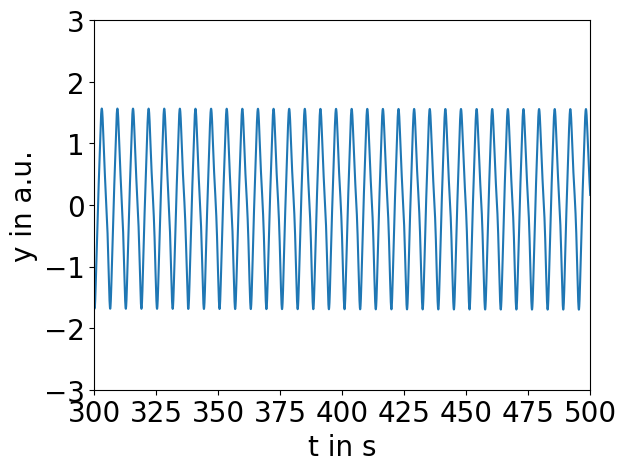

In [110]:
k = 1.43
gamma = 0.2
mu = 0.2
beta = 1
alpha = 1.21
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

xsol = lilie.x_solv()
ysol = lilie.y_solv()
psol = lilie.p_solv()
qsol = lilie.q_solv()

plt.plot(t, ysol, label = f"k: {k:.2f}")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
# plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in s", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([-3, 3])
plt.xlim([300,500])
# plt.savefig(path + "y_timeseries_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

In [60]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).peak()[1][1]['peak_heights'][-10:]

    return amp
import math
def approx(listofnum, tol):
     mean = np.mean(listofnum)
     boolean = [abs(i - mean) / mean * 100 for i in listofnum]
     
     for num in boolean:
          if num > tol:
               return math.nan
          else:
               return mean

In [111]:
np.mean(compute_amplitude((1,1.4,1.4,1), t, keep, k, mu, gamma, alpha, beta))

np.float64(1.551983506242696)

# Phase plane

Duffing

In [113]:
k_up = np.arange(1.2,1.8, 0.01)
k_up

array([1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
       1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
       1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
       1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63,
       1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74,
       1.75, 1.76, 1.77, 1.78, 1.79, 1.8 ])

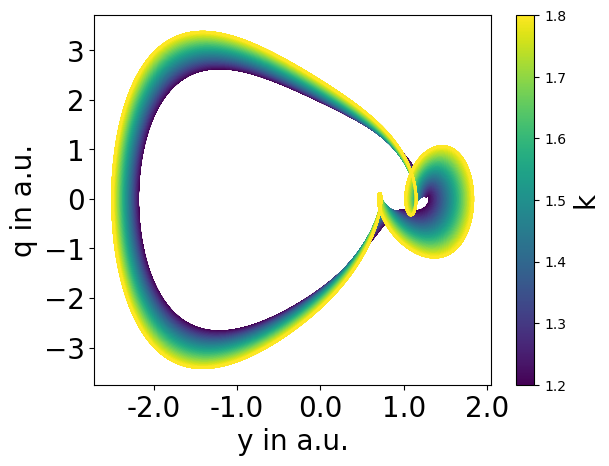

In [136]:
with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)

k = np.arange(1.2,1.8, 0.01)
gamma = 0.1
mu = 2
beta = 1
alpha = 0.2

cmap = plt.get_cmap('viridis', len(k))
fig, ax = plt.subplots()
for i in range(len(k)):
  par = 1,1,1,1
  limit = OnesidedCoupling(par, t, keep, k[i], mu, gamma, alpha, beta)

  ax.plot(limit.y_solv()[-keep:],limit.q_solv()[-keep:], color = cmap(i))  

 
plt.xlabel("y in a.u.",fontsize = 20)
plt.ylabel("q in a.u.",fontsize = 20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(np.linspace(-2,2, 5), fontsize = 20)

normalize = mcolors.Normalize(vmin=k.min(), vmax=k.max())

norm = Normalize(vmin = min(k), vmax = max(k))
sm = ScalarMappable(cmap = "viridis", norm = norm)
sm.set_array([])
plt.colorbar(sm, ax = ax).ax.set_ylabel('k', fontsize = 20)


plt.yticks(fontsize = 20)
plt.savefig(path +"y_phaseplane_alphawithout colorbar" + ".png", dpi =  300, bbox_inches = "tight")
# plt.show()

In [71]:
k_up = np.arange(0.01,1, 0.01)
alpha = np.arange(0.01, 3, 0.1)
[6, 6], [8, 133], [9, 135], [10, 137], [11, 139], [12, 142]

([6, 6], [8, 133], [9, 135], [10, 137], [11, 139], [12, 142])

In [73]:
k_up = np.arange(0.01,2.5, 0.01)[133]
alpha = np.arange(0.01, 3, 0.1)[8]
print(k, alpha)

0.61 0.81
